<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/T%C3%B3pico%2002%20-%20Aprendizado%20Supervisionado/Regress%C3%A3o/Topico_02_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão

A regressão é uma técnica de aprendizado de máquina que busca prever valores contínuos com base em dados históricos. Ela é frequentemente utilizada em problemas de previsão, como preços de ações, vendas de produtos, ou até mesmo a temperatura. A regressão pode ser realizada usando vários algoritmos, incluindo o K-Nearest Neighbors (KNN), Support Vector Machines (SVM), Árvores de Decisão e Multi-Layer Perceptron (MLP).

Durante este tutorial, iremos utilizar o MSE como uma das métricas de avaliação de nossos modelos de regressão

#Dataset California House Pricing

Previsão de Valores de Casas


In [3]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
# Carrega o conjunto de dados
california = fetch_california_housing()

print(california.data.shape)
print(california.data[0])
# Cria um DataFrame do Pandas com os dados e os nomes das colunas
df = pd.DataFrame(california.data, columns=california.feature_names)

# Adiciona a coluna de valores alvo ao DataFrame
df['Target'] = california.target*100000

# Exibe as primeiras 5 linhas do DataFrame
print(df.head(5))

(20640, 8)
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude    Target  
0    -122.23  452600.0  
1    -122.22  358500.0  
2    -122.24  352100.0  
3    -122.25  341300.0  
4    -122.25  342200.0  


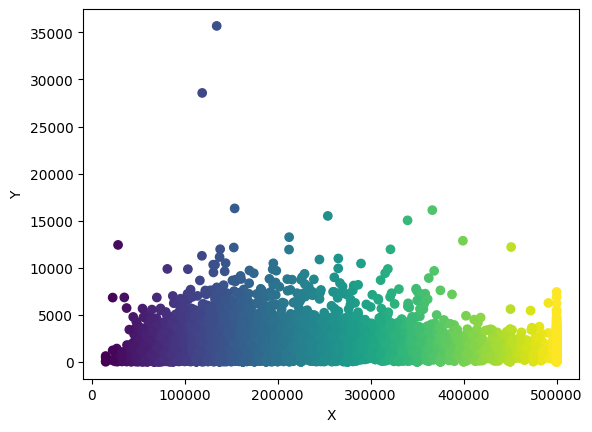

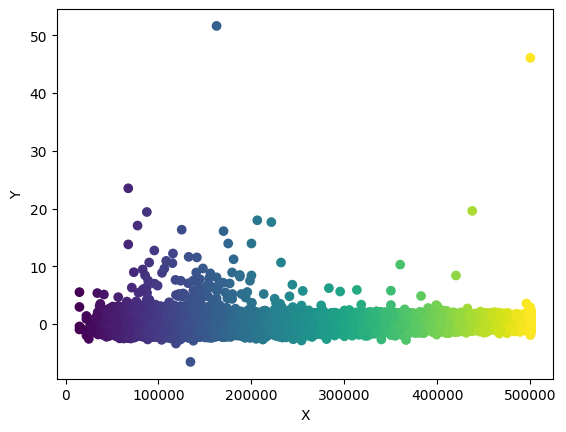

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Visualizando pop vs preço
data = california.data[:,4]
target = california.target*100000 
plt.scatter(target, data, c=target)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


#Vamos reduzir a 2 features, e comparar a distribuição com o target
scaler = StandardScaler()
data = scaler.fit_transform(california.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)


plt.scatter(target, X_pca[:,0], c=target)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#Modelos de Regressão

##KNN

In [19]:
from sklearn.model_selection import train_test_split

print(data.shape)
california.target*=100000 
X_train, X_test, y_train, y_test = train_test_split(data, california.target, test_size=0.3, 
                                                    random_state=0)

print(X_train.shape,X_test.shape)

(20640, 8)
(14448, 8) (6192, 8)


In [20]:
from sklearn.neighbors import KNeighborsRegressor


#instanciando meu modelo
knn = KNeighborsRegressor(n_neighbors=3)

#treino
knn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=3)

In [21]:
#test
resp = knn.predict(X_test)

In [22]:
for i in range(0,20):
  print(X_test[i],y_test[i],resp[i])


[ 0.1479801  -0.52756083  0.09460886 -0.04474252  0.1108437   0.10687073
 -1.42884054  1.25766189] 136900.0 130766.66666666667
[ 1.0048181   0.26701995  0.27412908 -0.35648121 -0.11433484 -0.00478308
 -0.80147053  0.79846163] 241299.99999999997 240400.0
[ 0.25162391  0.02864572  0.20278452 -0.14867697  0.11349286 -0.01545792
  1.41305194 -1.13317424] 200700.0 129300.0
[-0.74723085  0.66431034 -0.17624173  0.46471101 -0.91438098 -0.03121342
 -1.13856486  1.98140143] 72500.0 66333.33333333333
[ 0.59703311 -0.2891866  -0.44853992 -0.12048404 -0.68567022 -0.13077995
  1.01041149 -1.42766137] 459999.99999999994 292333.3333333333
[-0.68559199  1.85618152 -0.37548797  0.05479298 -1.06626612 -0.09763827
  1.03850269 -1.35778306] 120000.0 207533.33333333334
[ 1.15562537 -1.00430931  0.22777356 -0.42446302 -0.27240136  0.10564959
  0.91209231 -1.24797431] 247000.00000000003 253566.66666666666
[ 1.08266939  0.66431034  0.16184062 -0.2598563  -0.55762752 -0.07080448
 -0.68442389  0.5688615 ] 33690

#Erro Quadrático Médio (MSE)

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, resp)
print(mse)
print(np.sqrt(mse)) #rmse


4754164498.550728
68950.4495891849


##Comparativo entre os classificadores

In [32]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
knn = KNeighborsRegressor(n_neighbors=7)
dt = DecisionTreeRegressor(criterion='poisson')
mlp = MLPRegressor(hidden_layer_sizes=(5,), activation='logistic')
svr = SVR()

for clf_names, clf in zip(['KNN','DT','MLP','SVR'],[knn,dt,mlp,svr]):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  print(clf_names, np.sqrt(mse))

KNN 65750.4930458337
DT 74060.9020145808


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP 236883.08260246718
SVR 118226.33391978491
